In [ ]:
import os
import pandas as pd
import numpy as np
import inspect
import ydata_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
data = pd.read_csv("AirQualityUCI.csv", sep=';')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [ ]:
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


Just testing y data profiling:

In [ ]:
data = data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [ ]:
for col in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
    data[col] = data[col].str.replace(',', '.').astype(float)

In [ ]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


# **EDA:**

# **1.1:Univariate Analysis**

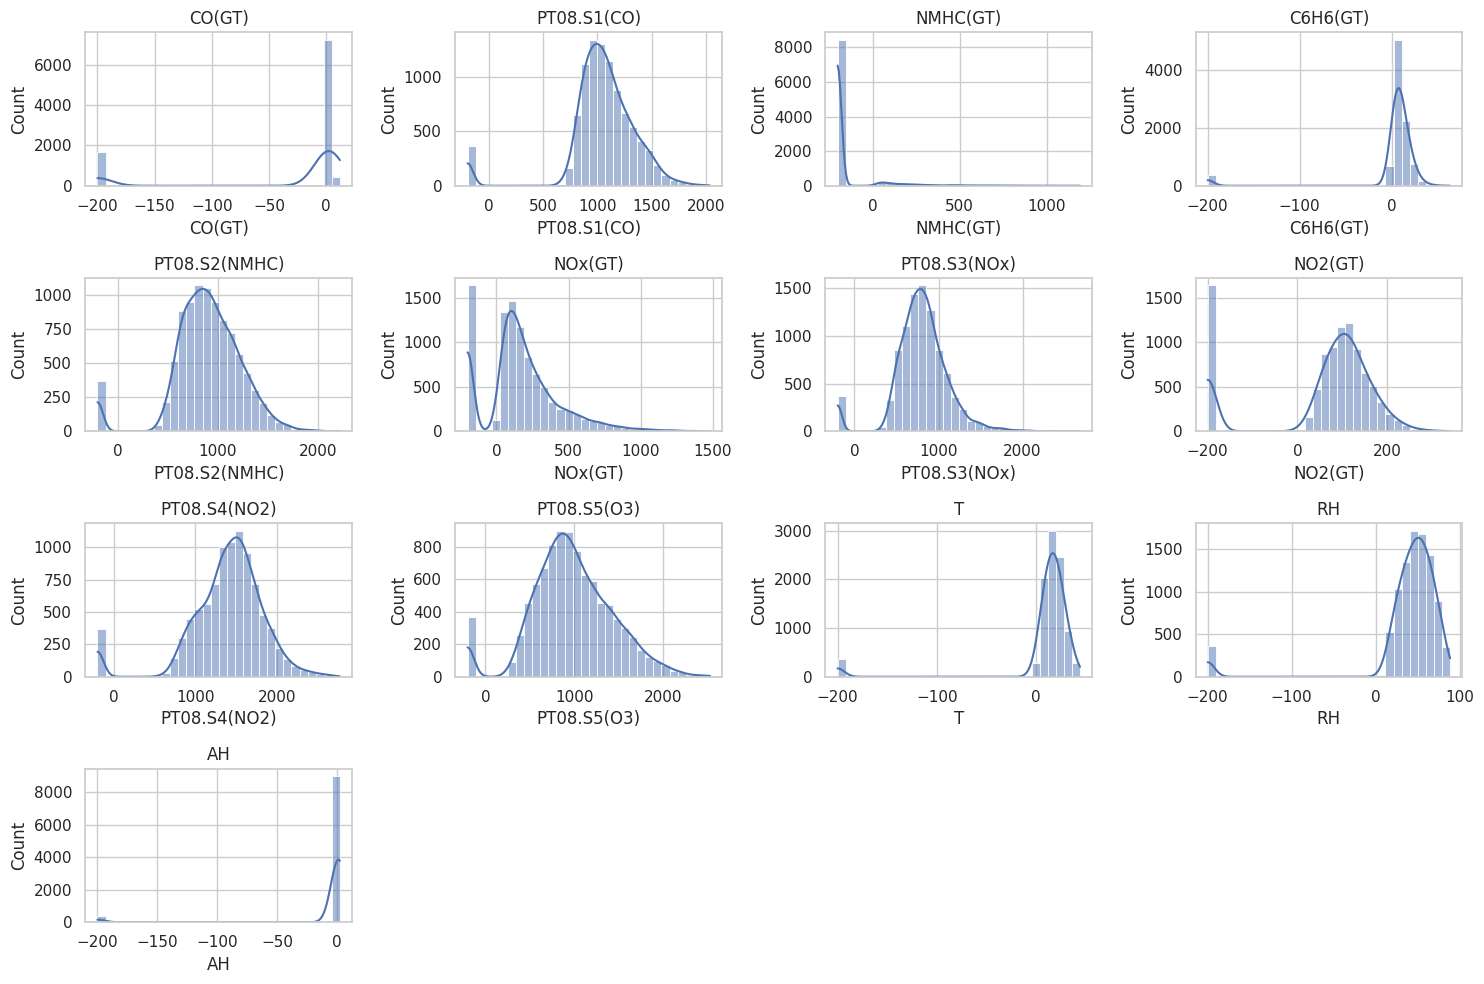

(            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
 count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
 mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
 std      77.657170   329.832710   139.789093    41.380206     342.333252   
 min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
 25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
 50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
 75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
 max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   
 
            NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
 count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
 mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
 std     257.433866    321.993552   126.940455    467.210125   456.938184 

In [ ]:
sns.set(style="whitegrid")

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
descriptive_stats = data.describe()

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()

descriptive_stats, plt.show()

CO(GT), NMHC(GT), C6H6(GT), NOx(GT), NO2(GT), PT08.S1(CO), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2), and PT08.S5(O3) show a minimum value of -200 which is missing values
and these values significantly affects the mean and standard deviation, it is outliers

Also we have a lot of NaN rows

# **1.2:Multivariate Analysis**

#Correlation Analysis

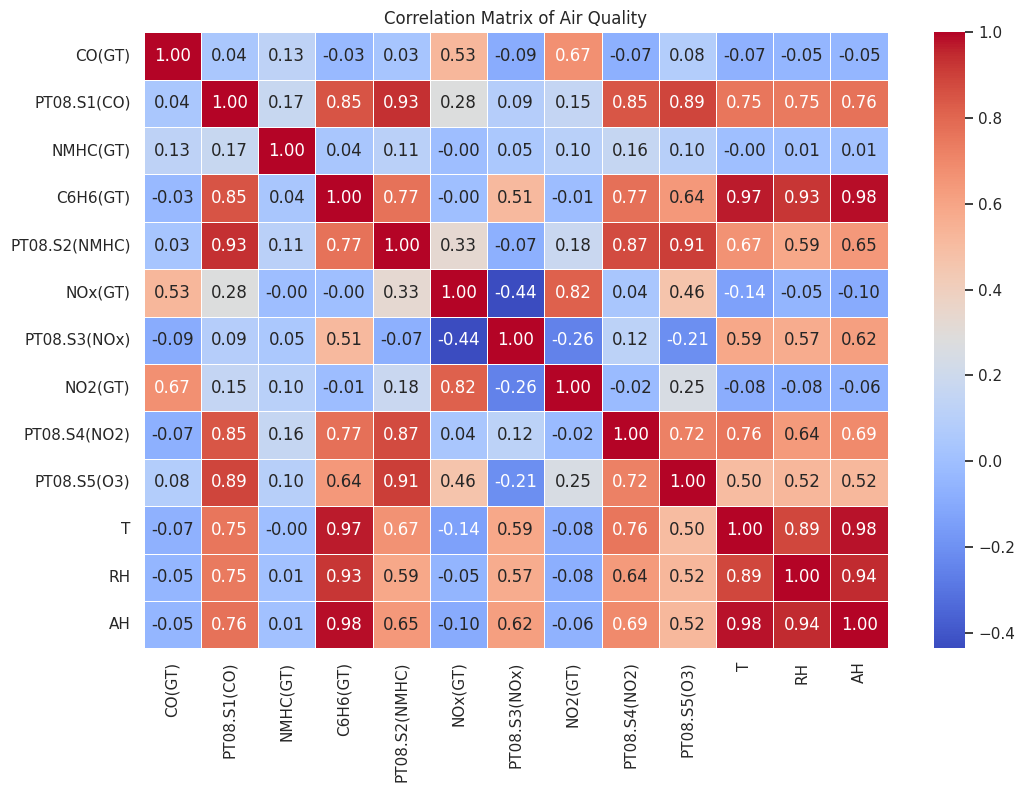

In [ ]:
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Air Quality")
plt.show()

A lot pairs of variables have strong positive or negative correlations. For example, PT08.S1(CO) shows strong positive correlations with C6H6(GT) and PT08.S2(NMHC).

There are also notable negative correlations, such as between PT08.S3(NOx) and several other variables like NOx(GT), NO2(GT), and PT08.S5(O3).

Weak Correlations: T (temperature), RH (relative humidity), and AH (absolute humidity) show weaker correlations

**In analysis below I will select a few variables that show strong correlations with C6H6(GT). This will help us understand how C6H6(GT) behaves in relation to these variables.**

Before plotting, I will remove the instances where C6H6(GT) is -200 to avoid skewing our analysis with missing values.

# Pairwise Scatter Plots

In [ ]:
filtered_data = data[data['C6H6(GT)'] != -200]

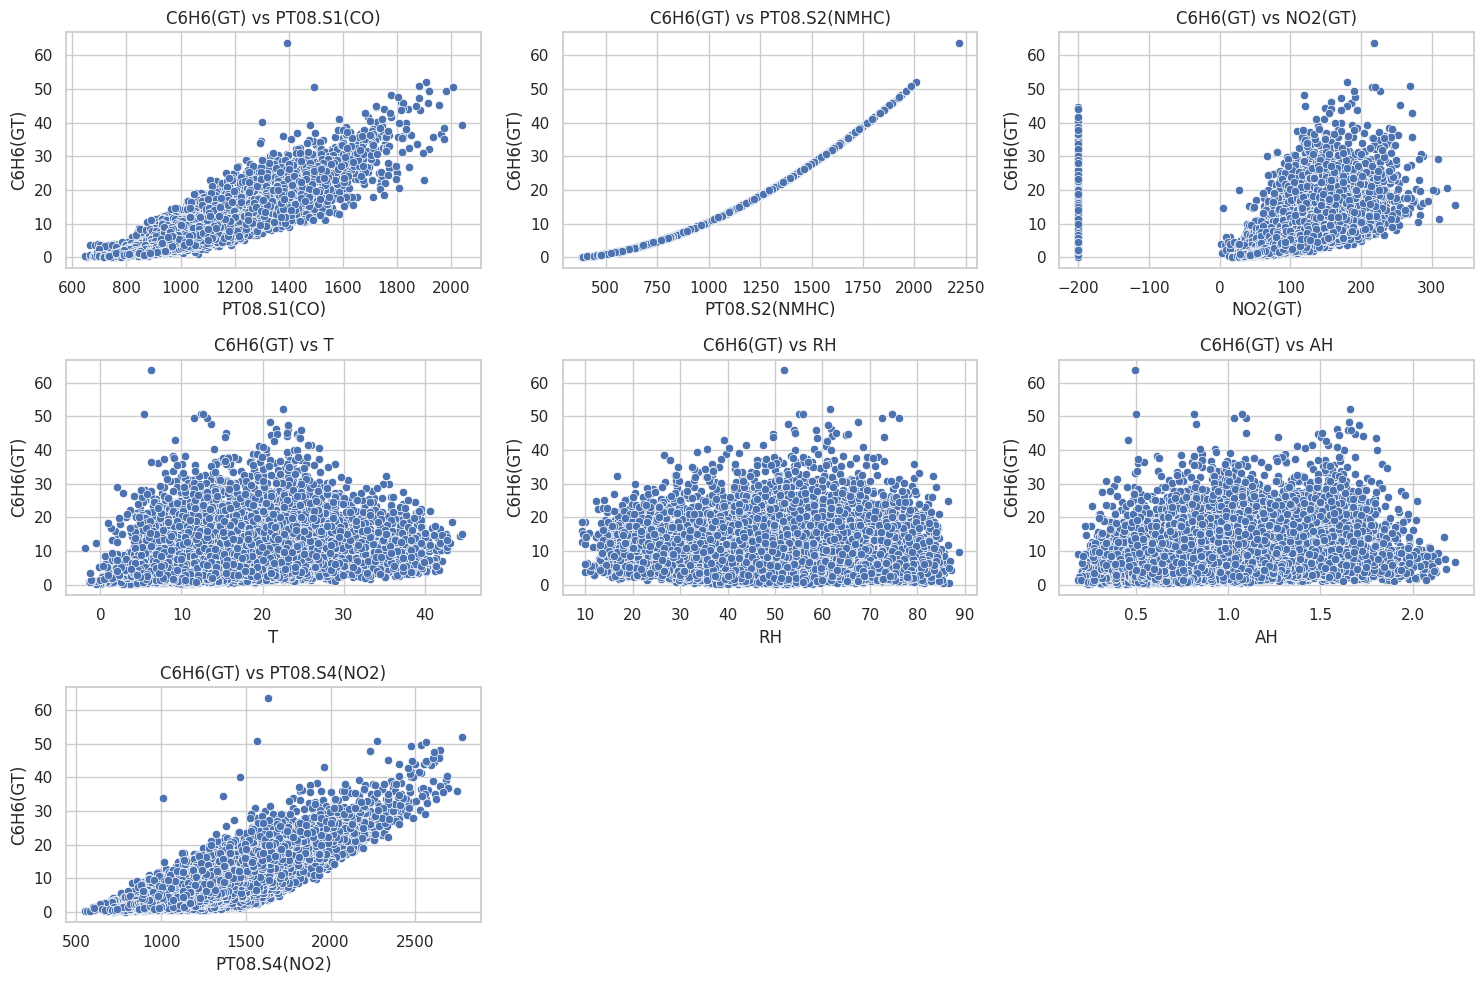

In [ ]:
variables_to_plot = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'NO2(GT)', 'T', 'RH', 'AH', 'PT08.S4(NO2)']

plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_to_plot):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=filtered_data[var], y=filtered_data['C6H6(GT)'])
    plt.title(f'C6H6(GT) vs {var}')
    plt.tight_layout()

plt.show()

PT08.S1(CO) and PT08.S2(NMHC): Both show a strong positive relationship with C6H6(GT). This indicates that as the sensor readings for CO and NMHC increase, the Benzene concentration also tends to increase.

NO2(GT): Positive trend with C6H6(GT). The relationship seems to be more scattered, suggesting there are other factors might be influencing. This graphs show that there are a lot of missing values (the vetical lines around -200)

Temperature (T): There is a less clear but still noticeable upward trend, suggesting that higher temperatures might be associated with higher Benzene concentrations.

Relative Humidity (RH) and Absolute Humidity (AH): The scatter is more dispersed, indicating a weaker correlation, but there seems to be a positive association.

PT08.S4(NO2): This sensor reading also shows a positive relationship with C6H6(GT), similar to PT08.S1(CO) and PT08.S2(NMHC), but with slightly more scattered.

# **Data preparation:**

# **2.1:Deal with missing values**

In [ ]:
info = data.info()
head = data.head()
nan_count = data.isna().sum()

info, head, nan_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


(None,
          Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
 0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
 1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
 2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
 3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
 4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
 
    PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
 0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
 1          955.0    103.0        1174.0     92.0        1559.0        972.0   
 2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
 3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
 4          836.0    131.0        1205.0    116.0        1490.0       1110.0   
 
       T    RH      AH  
 0  13.6  48.9  0.7578  
 1  13.3  47.7  0.7255  
 2  11.9  54.0  0.75

In [ ]:
data.shape

(9471, 15)

In [ ]:
num_rows_to_remove = 114

In [ ]:
total_rows = data.shape[0]

In [ ]:
start_index = total_rows - num_rows_to_remove

In [ ]:
data = data.drop(data.index[start_index:])

In [ ]:
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [ ]:
missing_values = (data == -200).sum()
missing_values[missing_values > 0]

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [ ]:
data.shape

(9357, 15)

I have already dropped unnamed 15 and unnamed 16. Other columns it might be reasonable to consider dropping this column, especially when it's missing over 90% of its data.

We have to options to do:

1) Imputation: fill missing values with previous or subsequent values (forward or backward fill) or we can use the mean or median

2) Removal: If the missing values are not significant in number, we can remove the rows with missing data

All missing values will be handled like:

Drop the NMHC(GT) column due to the excessive amount of missing data

Rows with missing C6H6(GT) values (our target variable) will be removed

Missing values in other columns will be imputed using a forward fill method

In [ ]:
data.drop(columns=['NMHC(GT)'], inplace=True)

In [ ]:
data = data[data['C6H6(GT)'] != -200]

In [ ]:
data.shape

(8991, 14)

In [ ]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
 # with NaN and after with forward filling
data = data.copy()
data.replace(-200, None, inplace=True)
data.fillna(method='ffill', inplace=True)


In [ ]:
data.shape

(8991, 14)

In [ ]:
missing_values = (data.isnull()).sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [ ]:
missing_values = (data == -200).sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

# **2.2:Normalization of data/scaling**

Next I will proceed with Standard Scaling all columns excpt 'Date', 'Time' and target C6H6(GT). The explanations below code

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
columns_to_scale = data.columns.drop(['Date', 'Time', 'C6H6(GT)'])

In [ ]:
scaler = StandardScaler()

In [ ]:
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [ ]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,0.369954,1.198550,11.9,0.400450,-0.352569,0.858660,0.096092,0.680947,0.615100,-0.534197,-0.019300,-0.663043
1,10/03/2004,19.00.00,-0.041414,0.885284,9.4,0.059391,-0.666013,1.318156,-0.354907,0.296762,-0.127757,-0.568166,-0.088601,-0.743035
2,10/03/2004,20.00.00,0.095708,1.392038,9.0,-0.000575,-0.526705,1.185759,0.117568,0.285208,0.128228,-0.726687,0.275226,-0.681865
3,10/03/2004,21.00.00,0.095708,1.272260,9.2,0.033156,-0.322717,0.998845,0.289378,0.368977,0.451972,-0.828594,0.621728,-0.591471
4,10/03/2004,22.00.00,-0.315660,0.793147,6.5,-0.386608,-0.526705,1.438871,0.160521,0.097448,0.218575,-0.805948,0.598628,-0.586271


Many regression algorithms assume that the input features are normally distributed. So StandarD Scaling is helping us here. ALso Standard Scaling helps in speeding up the convergence of gradient descent. Also compared to Min-Max Scaling, Standard Scaling is less sensitive to outliers since it does not normalize the data within a bounded range. This is important for our dataset as it contains sensor readings that could be affected outlier values.

# 3:Feature engineering - basic transformations (nonlinear)

Now I will proceed with following feature engineering steps:
Time-based Features: Extract features like hour, day, month from the 'Date' and 'Time', because in our case patterns can often be dependent on the time of the observation

Polynomial Features: Create squared (or higher degree) terms for features that show a non-linear pattern with the target.
I chose polynomial features because:
**Sensor Readings:**The relationship between sensor readings and actual pollutant concentrations might not be linear. Squaring (or higher-degree terms) can capture such non-linear growth.
**Temperature (T):**Temperature can have a complex relationship with air pollutant levels.

Interaction Terms: Create interaction terms for features that might affect the target variable when combined.For example the combined effect of temperature and humidity or any other might be different on certain pollutant concentrations than either alone

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


Correlation Matrix Analysis:
It has a strong positive correlation with PT08.S2(NMHC), T (Temperature), and

Scatter Plots Analysis:
C6H6(GT) vs PT08.S2(NMHC): Shows a clear nonlinear relationship, which suggests that a polynomial transformation might capture the relationship better than a linear model.

C6H6(GT) vs T: Indicates a potential nonlinear relationship, with more variability at lower temperatures.

C6H6(GT) vs AH: Although the correlation is strong, the scatter plot doesn't show a clear pattern, indicating potential nonlinearity or other complexities.

C6H6(GT) vs NO2(GT) and PT08.S4(NO2): Show some degree of a nonlinear pattern, particularly with NO2(GT) where there seems to be a plateau or saturation effect at higher levels.

In [ ]:
features_for_poly = ['PT08.S2(NMHC)', 'T', 'NO2(GT)', 'PT08.S4(NO2)']
nan_check = data[features_for_poly].isnull().sum()
nan_check[nan_check > 0]

Series([], dtype: int64)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[features_for_poly])


In [ ]:
poly_features.shape

(8991, 14)

In [ ]:
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(features_for_poly))
data = data.drop(features_for_poly, axis=1)
data = pd.concat([data.reset_index(drop=True), poly_features_df.reset_index(drop=True)], axis=1)

data.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),PT08.S5(O3),RH,AH,...,PT08.S2(NMHC)^2,PT08.S2(NMHC) T,PT08.S2(NMHC) NO2(GT),PT08.S2(NMHC) PT08.S4(NO2),T^2,T NO2(GT),T PT08.S4(NO2),NO2(GT)^2,NO2(GT) PT08.S4(NO2),PT08.S4(NO2)^2
0,10/03/2004,18.00.00,0.369954,1.198550,11.9,-0.352569,0.858660,0.615100,-0.019300,-0.663043,...,1.603600e-01,-0.213919,0.038480,0.272685,0.285367,-0.051332,-0.363760,0.009234,0.065434,0.463689
1,10/03/2004,19.00.00,-0.041414,0.885284,9.4,-0.666013,1.318156,-0.127757,-0.088601,-0.743035,...,3.527344e-03,-0.033744,-0.021078,0.017625,0.322813,0.201646,-0.168610,0.125959,-0.105323,0.088068
2,10/03/2004,20.00.00,0.095708,1.392038,9.0,-0.526705,1.185759,0.128228,0.275226,-0.681865,...,3.304356e-07,0.000418,-0.000068,-0.000164,0.528074,-0.085435,-0.207257,0.013822,0.033531,0.081344
3,10/03/2004,21.00.00,0.095708,1.272260,9.2,-0.322717,0.998845,0.451972,0.621728,-0.591471,...,1.099334e-03,-0.027473,0.009595,0.012234,0.686568,-0.239776,-0.305732,0.083739,0.106774,0.136144
4,10/03/2004,22.00.00,-0.315660,0.793147,6.5,-0.526705,1.438871,0.218575,0.598628,-0.586271,...,1.494656e-01,0.311586,-0.062059,-0.037674,0.649552,-0.129371,-0.078538,0.025767,0.015642,0.009496


In [ ]:
data.shape

(8991, 24)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Hour'] = data['Time'].str.extract('(\d+).').astype(int)
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6

In [ ]:
data.shape

(8991, 28)

In [ ]:
data = data.drop(['Date','Time'], axis=1)

In [ ]:
data.head().T

,0,1,2,3,4
CO(GT),0.369954,-0.041414,9.570838e-02,0.095708,-0.315660
PT08.S1(CO),1.198550,0.885284,1.392038e+00,1.272260,0.793147
C6H6(GT),11.900000,9.400000,9.000000e+00,9.200000,6.500000
NOx(GT),-0.352569,-0.666013,-5.267047e-01,-0.322717,-0.526705
PT08.S3(NOx),0.858660,1.318156,1.185759e+00,0.998845,1.438871
PT08.S5(O3),0.615100,-0.127757,1.282277e-01,0.451972,0.218575
RH,-0.019300,-0.088601,2.752263e-01,0.621728,0.598628
AH,-0.663043,-0.743035,-6.818648e-01,-0.591471,-0.586271
PT08.S2(NMHC),0.400450,0.059391,-5.748353e-04,0.033156,-0.386608
T,-0.534197,-0.568166,-7.266872e-01,-0.828594,-0.805948


PT08.S2(NMHC) and NO2(GT), both of them are sensor's responses targeting different pollutants (NMHC and NO2 respectively) that could have combined effects on the levels of C6H6(GT).

PT08.S2(NMHC) and PT08.S4(NO2), two sensor responses are related to NMHC and NO2 concentrations their interaction term could capture any joint sensitivity or cross sensitivity to our target value

Temperature (T) and NO2(GT), PT08.S4(NO2), temperature can affect the chemical reactions in the air, potentially influencing the reaction


In [ ]:
interaction_features = data[['PT08.S2(NMHC)', 'NO2(GT)', 'PT08.S4(NO2)', 'T']].copy()

interaction_features['Interaction_NMHC_NO2'] = data['PT08.S2(NMHC)'] * data['NO2(GT)']
interaction_features['Interaction_NMHC_NO2_Sensor'] = data['PT08.S2(NMHC)'] * data['PT08.S4(NO2)']
interaction_features['Interaction_T_NO2'] = data['T'] * data['NO2(GT)']
interaction_features['Interaction_T_NO2_Sensor'] = data['T'] * data['PT08.S4(NO2)']

data = pd.concat([data, interaction_features], axis=1)


In [ ]:
data.head().T

,0,1,2,3,4
CO(GT),0.369954,-0.041414,9.570838e-02,0.095708,-0.315660
PT08.S1(CO),1.198550,0.885284,1.392038e+00,1.272260,0.793147
C6H6(GT),11.900000,9.400000,9.000000e+00,9.200000,6.500000
NOx(GT),-0.352569,-0.666013,-5.267047e-01,-0.322717,-0.526705
PT08.S3(NOx),0.858660,1.318156,1.185759e+00,0.998845,1.438871
PT08.S5(O3),0.615100,-0.127757,1.282277e-01,0.451972,0.218575
RH,-0.019300,-0.088601,2.752263e-01,0.621728,0.598628
AH,-0.663043,-0.743035,-6.818648e-01,-0.591471,-0.586271
PT08.S2(NMHC),0.400450,0.059391,-5.748353e-04,0.033156,-0.386608
T,-0.534197,-0.568166,-7.266872e-01,-0.828594,-0.805948


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CO(GT)                       8991 non-null   float64
 1   PT08.S1(CO)                  8991 non-null   float64
 2   C6H6(GT)                     8991 non-null   float64
 3   NOx(GT)                      8991 non-null   float64
 4   PT08.S3(NOx)                 8991 non-null   float64
 5   PT08.S5(O3)                  8991 non-null   float64
 6   RH                           8991 non-null   float64
 7   AH                           8991 non-null   float64
 8   PT08.S2(NMHC)                8991 non-null   float64
 9   T                            8991 non-null   float64
 10  NO2(GT)                      8991 non-null   float64
 11  PT08.S4(NO2)                 8991 non-null   float64
 12  PT08.S2(NMHC)^2              8991 non-null   float64
 13  PT08.S2(NMHC) T   

# **4:Baseline model - linear regression without regularization**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.metrics import mean_squared_error, r2_score

 Lasso Regression is suitable choice because it not only helps in regularization to prevent overfitting but also performs feature selection by reducing some coefficients to zero

In [ ]:
lasso_cv_model = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5, random_state=42)

In [ ]:
X = data.drop(columns='C6H6(GT)')  # Drop non-feature columns
y = data['C6H6(GT)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_baseline = linear_reg.predict(X_test)

In [ ]:
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = mse_baseline ** 0.5
r2_baseline = r2_score(y_test, y_pred_baseline)

In [ ]:
print(f"MSE (Baseline Model): {mse_baseline}")
print(f"RMSE (Baseline Model): {rmse_baseline}")
print(f"R^2 (Baseline Model): {r2_baseline}")

MSE (Baseline Model): 0.004964697797051235
RMSE (Baseline Model): 0.07046061167099839
R^2 (Baseline Model): 0.9999136005883454


In [ ]:
residuals1 = y_test - y_pred_baseline

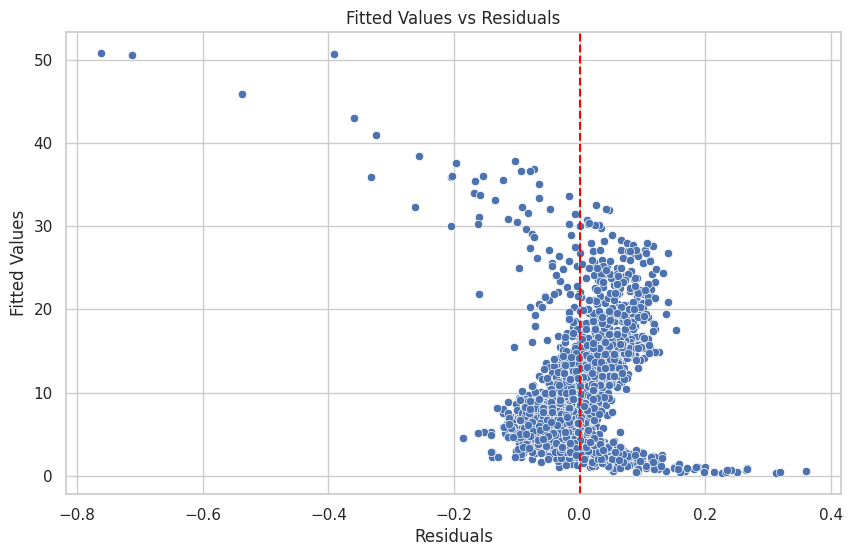

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=residuals1, y=y_test)
plt.title('Fitted Values vs Residuals')
plt.xlabel('Residuals')
plt.ylabel('Fitted Values')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

below **lasso**

In [ ]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
        cv=5, random_state=42)

In [ ]:
best_alpha = lasso_cv_model.alpha_

In [ ]:
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train, y_train)
y_pred_lasso = lasso_best.predict(X_test)

In [ ]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5
r2_lasso = r2_score(y_test, y_pred_lasso)

In [ ]:
print(f"Best alpha: {best_alpha}")
print(f"MSE: {mse_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"R^2: {r2_lasso}")

Best alpha: 1e-06
MSE: 0.005112856743249881
RMSE: 0.07150424283390379
R^2: 0.9999110222147352


# Metrics chosen as well as reasoning behind each metric (10%);

MSE (Mean Squared Error): MSE is sensitive to outliers, as squaring the residuals gives more weight to larger errors. This is particularly useful if large errors are undesirable in the context of the problem.

RMSE (Root Mean Squared Error):  Like MSE, RMSE gives a relatively high weight to large errors, which can be useful if you want to penalize larger deviations more heavily.

R² (Coefficient of Determination): R² indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. It provides an understanding of how well the independent variables explain the variability of the dependent variable. An R² value of 1 means that the model explains all the variability of the response data around its mean, which is ideal. In practice, a higher R² value indicates a better fit of the model to the data

**These metrics are standard for regression problems and provide a comprehensive view of the model's performance. MSE and RMSE are directly related to the goal of regression, which is to minimize the difference between observed and predicted values. R² complements them by providing a scale-independent measure of fit quality, which is useful for comparing models.**

In [ ]:
residuals = y_test - y_pred_lasso

In [ ]:
residuals

1153   -0.015550
8659   -0.090429
5212   -0.040083
7708   -0.000451
4537   -0.014842
          ...   
5899   -0.341125
2478    0.102254
5028   -0.076789
5964    0.065207
7363   -0.109264
Name: C6H6(GT), Length: 1799, dtype: float64

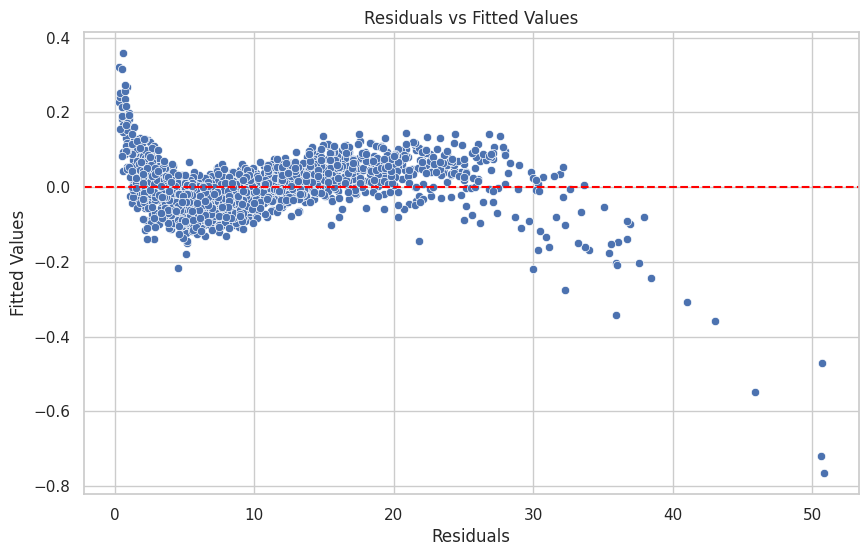

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Residuals')
plt.ylabel('Fitted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a nonlinear model is more appropriate. In this plot, the residuals appear to increase in variance as the fitted values increase.
Also, there is a cluster of points at the lower end of the residual scale, which might suggest some issues with the model fit in that region or the presence of outliers.

So,the variance of residuals increasing with fitted values suggests that a model with constant variance might not be the best fit for this data. The cluster of data points with large negative residuals could indicate that the model does not fit well for all observations, or there might be outliers or influential points that are affecting the model.

# Residual analysis was done and conclusions were drawn(5%);

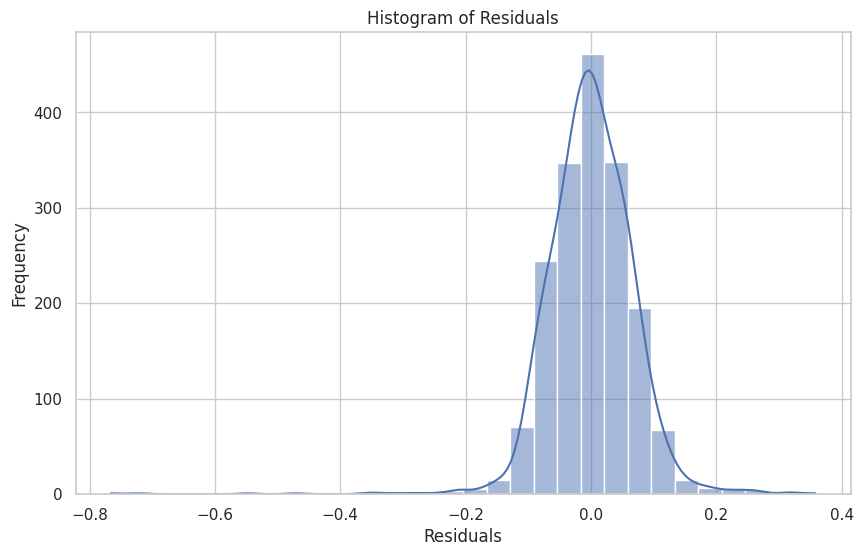

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The residuals in a well-fitted model should follow a normal distribution. In the provided histogram, the residuals seem to be approximately normally distributed, suggesting that the assumption of normality is reasonably met.

In [ ]:
Q1 = residuals.quantile(0.25)
Q3 = residuals.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
outlier_cutoff_lower = Q1 - 1.5 * IQR
outlier_cutoff_upper = Q3 + 1.5 * IQR

In [ ]:
potential_outliers = residuals[(residuals < outlier_cutoff_lower) | (residuals > outlier_cutoff_upper)]

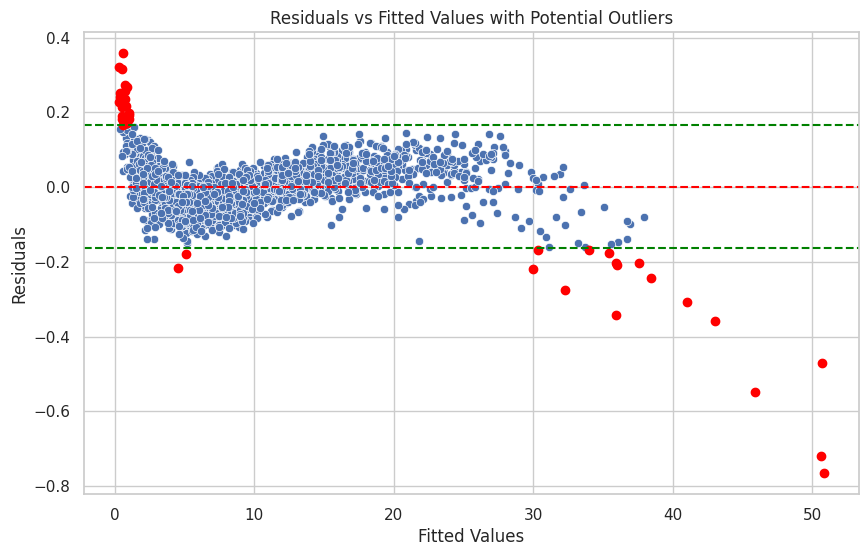

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.title('Residuals vs Fitted Values with Potential Outliers')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=outlier_cutoff_lower, color='green', linestyle='--')
plt.axhline(y=outlier_cutoff_upper, color='green', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--')
plt.scatter(y_test[potential_outliers.index], potential_outliers, color='red')
plt.show()

In [ ]:
len(potential_outliers)

38

about 38 potential outliers

In [ ]:
outlier_indices = potential_outliers.index

By now I will continue with Hyperparameters tuning (10%);

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import uniform
from sklearn.metrics import mean_squared_error

# Hyperparameters tuning

In [ ]:
param_dist = {'lasso__alpha': uniform(1e-07, 1e-04)}

In [ ]:
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state=42))
])

In [ ]:
random_search = RandomizedSearchCV(
    estimator=lasso_pipeline,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('lasso',
                                              Lasso(random_state=42))]),
                   n_iter=100,
                   param_distributions={'lasso__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bf91c37ac50>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
best_params = random_search.best_params_
best_score = -random_search.best_score_

In [ ]:
best_lasso_pipeline = random_search.best_estimator_
y_pred = best_lasso_pipeline.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
r2_random_search = r2_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score (MSE): {best_score}")
print(f"MSE: {test_mse}")
print(f"R^2: {r2_random_search}")

Best Parameters: {'lasso__alpha': 9.878869366005174e-05}
Best Cross-Validation Score (MSE): 0.004972368163679545
MSE: 0.0050204533720041725
R^2: 0.9999126302878217


**Initial Lasso Model:**

Alpha: 1e-06

MSE: 0.005112856743249881

RMSE: 0.07150424283390379

R^2: 0.9999110222147352

**Lasso with RandomizedSearchCV:**


Alpha: approximately 1e-04

Cross-Validation MSE: 0.004972368163679545

MSE: 0.0050204533720041725

RMSE: 0.07085515769

R^2: 0.9999126302878217


**I conducted hyperparameter optimization on a Lasso regression model using RandomizedSearchCV, which automatically searched across a specified range of the alpha parameter to improve model performance. This process resulted in a slightly optimized model with a more robust alpha value, achieving a marginally lower mean squared error and higher R-squared value on the test set, indicative of a better fit to the data**

# Feature importance

Extract the best estimator from the RandomizedSearchCV

In [ ]:
sns.set_style('whitegrid')
best_lasso_model = random_search.best_estimator_.named_steps['lasso']

feature_names = X_train.columns

lasso_coefficients = best_lasso_model.coef_

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lasso_coefficients
}).set_index('Feature')

feature_importance_sorted = feature_importance.abs().sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance_sorted

,Importance
Feature,
PT08.S2(NMHC),7.152858
PT08.S2(NMHC)^2,1.490223
PT08.S2(NMHC),0.424453
T,0.261483
T,0.210469
PT08.S2(NMHC) PT08.S4(NO2),0.110202
Interaction_NMHC_NO2_Sensor,0.092516
NO2(GT),0.084550
PT08.S4(NO2),0.072421


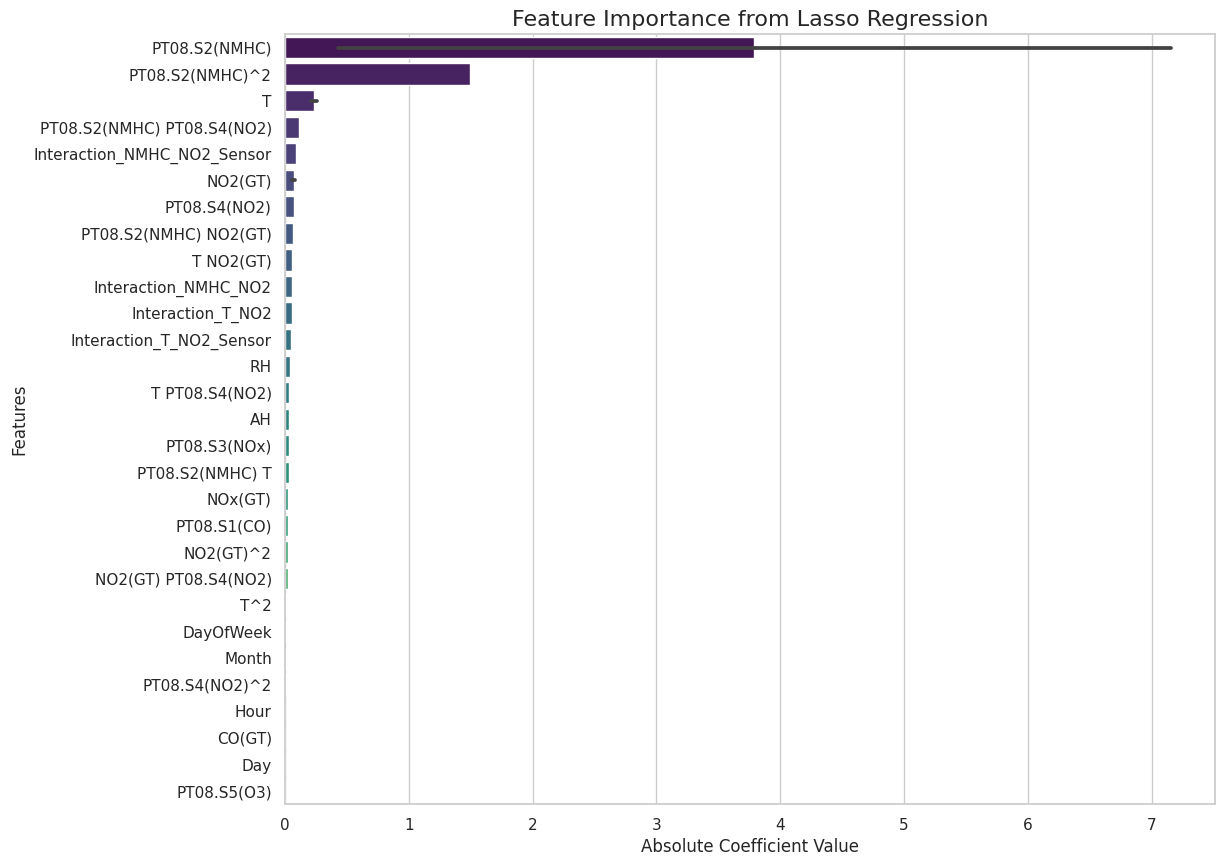

In [ ]:
plt.figure(figsize=(12, 10))
sns.barplot(x=feature_importance_sorted['Importance'], y=feature_importance_sorted.index, palette='viridis')

plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance from Lasso Regression', fontsize=16)

plt.show()